In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
data = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
#drop unneeded column
data.drop('gameId',inplace=True,axis=1)

In [5]:
data.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [6]:
#shuffle data
data = data.sample(frac=1).reset_index(drop=True)

In [7]:
#dependent variable
y = data['blueWins']
#independent variable
x = data.drop('blueWins',inplace=False,axis=1)

<Axes: >

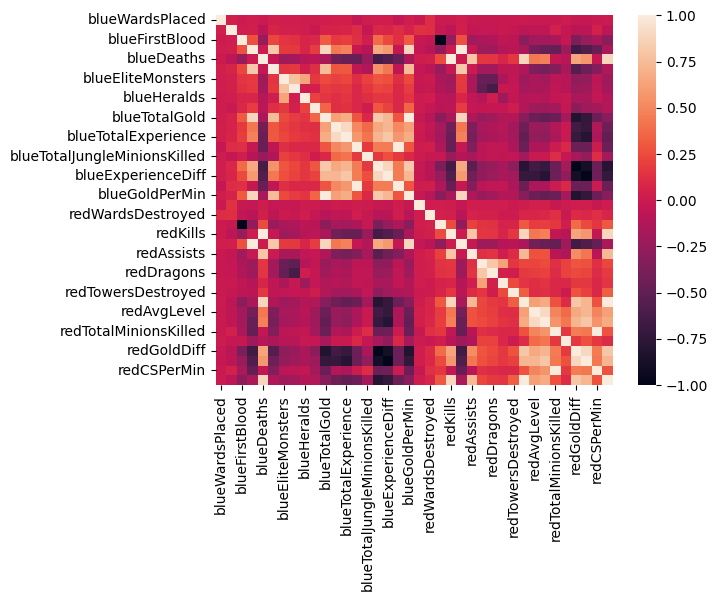

In [8]:
sns.heatmap(x.corr())

In [9]:
#set splitting numbers
trainTestSplit = 0.7
numExamples = x.shape[0]
numTrainExamples = int(np.floor(numExamples * trainTestSplit))
numTestExamples = int(np.ceil(numExamples - numTrainExamples))

In [10]:
#split training and testing samples
X_train = x.iloc[0:numTrainExamples, :]
Y_train = y.iloc[0:numTrainExamples]

X_test = x.iloc[numTrainExamples:numExamples,:]
Y_test = y.iloc[numTrainExamples:numExamples]

In [11]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [12]:

inputs = tf.keras.Input(shape=(38,))
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(inputs)
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 38)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 930 (3.63 KB)

 Trainable params: 930 (3.63 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [14]:
BATCH_SIZE = 32
EPOCHS = 300

In [15]:
model.fit(
    x=X_train,
    y=Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5904 - loss: 578.0876 - val_accuracy: 0.6898 - val_loss: 21.9340
Epoch 2/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.6499 - loss: 24.4270 - val_accuracy: 0.5929 - val_loss: 15.3646
Epoch 3/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.6289 - loss: 9.1641 - val_accuracy: 0.6132 - val_loss: 2.4134
Epoch 4/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.6366 - loss: 6.7322 - val_accuracy: 0.7332 - val_loss: 4.3295
Epoch 5/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.6516 - loss: 5.0726 - val_accuracy: 0.5546 - val_loss: 10.8941
Epoch 6/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.6519 - loss: 5.8007 - val_accuracy: 0.5922 - val_loss: 8.0406
Epoch 7/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 650us/step - accuracy: 0.6481 - loss: 8.2656 - val_accuracy: 0.7274 - val_loss: 7.4628
Epoch 8/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.6464 - los

In [16]:
loss, accuracy = model.evaluate(X_test, Y_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.7214 - loss: 0.5540
